### Natural Language Processing using Sklearn

In this notebook I will be trying to classify Yelp Reviews into 1 star or 5 star categories based on the text content in the reviews. I will be using the Yelp review dataset from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


#### First, let's perform some basic analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp_data = pd.read_csv('yelp.csv')
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


#### Feature Engineering 

In [5]:
yelp_data['text length'] = yelp_data['text'].apply(len)

#### This column contains the length of each individual text in the text column

In [6]:
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


#### Now let's perform some Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
sns.di

#### FacetGrid using  seaborn to create a grid of 5 histograms of text length based on the star ratings. This helps us understand the relationship between these two features.

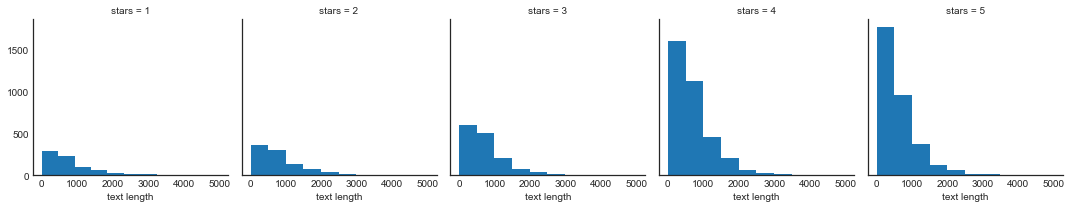

In [11]:
g = sns.FacetGrid(data=yelp_data,col='stars')
g.map(plt.hist,'text length')

#### As we can see there is not much of a correlation between review length and number of stars. 

#### Boxplot for text length for each star category.

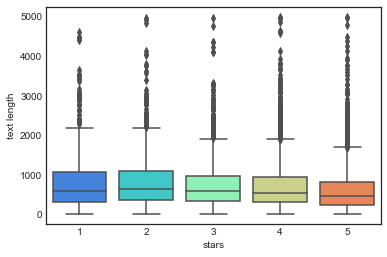

In [12]:
sns.boxplot(x='stars',y='text length',data=yelp_data,palette='rainbow')

#### Countplot of the number of occurrences for each type of star rating.

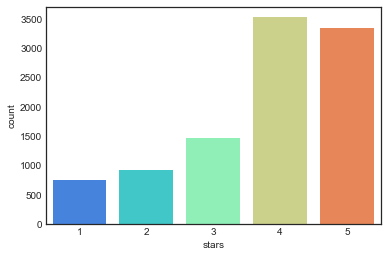

In [13]:
sns.countplot(x='stars',data=yelp_data,palette='rainbow')

#### Using groupby to get the mean values of the numerical columns.

In [14]:
stars = yelp_data.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


#### Using the corr() method on this groupby dataframe

In [15]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


#### using seaborn to create a heatmap based on this .corr() dataframe

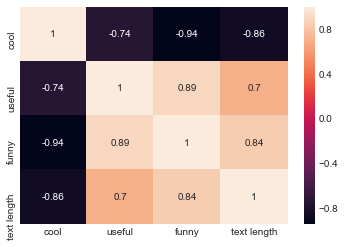

In [16]:
sns.heatmap(data=stars.corr(),annot=True)

### NLP Classification 

#### FIrst, to make things simple I will be performing a binary classification. The classifier will try to classifiy between 1 and 5 star reviews.

#### Creating a dataframe called yelp_1_5 that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [17]:
yelp_1_5 = yelp_data[(yelp_data.stars==1) | (yelp_data.stars==5)]

In [18]:
yelp_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


#### Creating features and targets ( text and reviews)

In [19]:
X = yelp_1_5['text']
y = yelp_1_5['stars']

#### Creating a counter vectorizer using sklearn

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
X = cv.fit_transform(X)

#### Test train split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### I will be using Naive Bayes classifier for this task since it almost always better for text classification

In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [25]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Prediction and Evaluation of the model

In [26]:
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
print('Accuracy :', accuracy_score(y_test,pred))

Accuracy : 0.9257748776508973


In [29]:
import itertools

In [30]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[159  69]
 [ 22 976]]


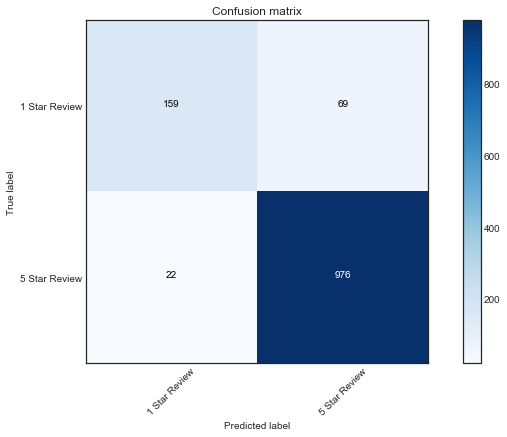

In [54]:
fig = plt.figure(figsize=(10,6))
plot_confusion_matrix(cm=(confusion_matrix(y_test,pred)),classes=['1 Star Review','5 Star Review'])

In [35]:
print('Classification Report ')
print(classification_report(y_test,pred))

Classification Report 
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



#### As we can see, the model is giving pretty good performace which is confirmed by all the evaluation metrics used here. The results are more than respectable even thought a there is a large class imbalance. 

### Now, let's try the same classifier for out multi-class classification

#### We will follow the same steps as above exepct we will try to classifiy all review stars instead of just 2

In [36]:
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [37]:
X_new = yelp_data['text']
y_new = yelp_data['stars']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [39]:
X_new = cv.fit_transform(X_new)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=101)

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
model_new = MultinomialNB()

In [44]:
model_new.fit(X_new,y_new)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
pred_new = model_new.predict(X_test_new)

In [46]:
print('Accuracy :',accuracy_score(y_test_new,pred_new))

Accuracy : 0.763


Confusion matrix, without normalization
[[147   6  17  39  11]
 [  4 148  27  84  10]
 [  6   3 254 155  25]
 [  6   2   3 938 115]
 [  3   0   3 192 802]]


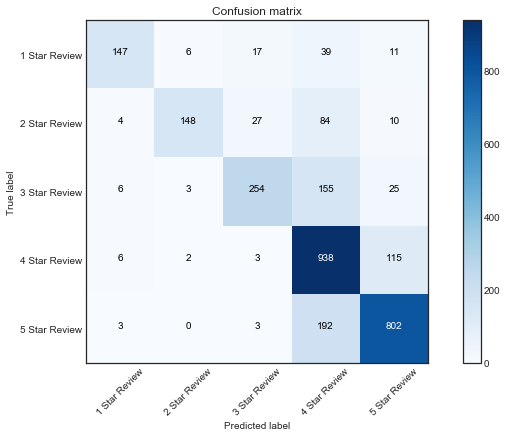

In [55]:
fig = plt.figure(figsize=(10,6))
plot_confusion_matrix(cm=(confusion_matrix(y_test_new,pred_new)),classes=['1 Star Review','2 Star Review','3 Star Review',
                                                                 '4 Star Review','5 Star Review'])

In [50]:
print('Classification Report ')
print(classification_report(y_test_new,pred_new))

Classification Report 
             precision    recall  f1-score   support

          1       0.89      0.67      0.76       220
          2       0.93      0.54      0.69       273
          3       0.84      0.57      0.68       443
          4       0.67      0.88      0.76      1064
          5       0.83      0.80      0.82      1000

avg / total       0.79      0.76      0.76      3000



#### As we can see, the performace of the model decreases significantly in multi class problems. Here is when we should be looking at the f1-score as our best evaluation metric. Since it is weighted average of precision and recall it will almost always give better evaluation results that are interpretable for multi-class problems

### Now, let's give it one more go using the TfidfTransformer  (Text preprocessing) from sklearn.

In [51]:
from sklearn.feature_extraction.text import  TfidfTransformer

#### Import Pipeline from sklearn

In [56]:
from sklearn.pipeline import Pipeline

#### Creating a pipeline with CountVectorizer, TfidfTransformer and MultinomialNB

In [57]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

#### Classification using this pipeline ( Just the first binary classifcation, this is to compare the performance of manual preprocessing vs automated preprocessing using pipeline )

In [58]:
X_p = yelp_1_5['text']
y_p = yelp_1_5['stars']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p,test_size=0.3,random_state=101)

In [59]:
pipeline.fit(X_train_p,y_train_p)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
pred_p = pipeline.predict(X_test_p)

In [61]:
print('Accuracy :',accuracy_score(y_test_p,pred_p))

Accuracy : 0.8140293637846656


Confusion matrix, without normalization
[[  0 228]
 [  0 998]]


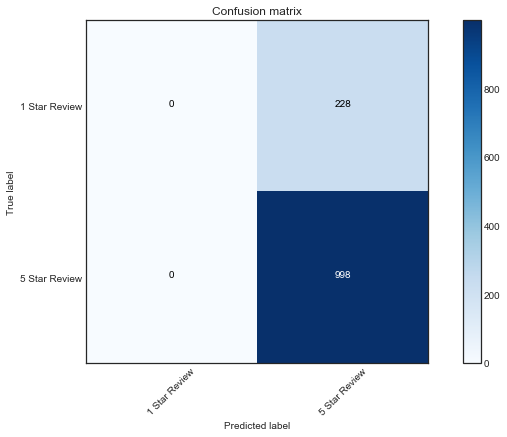

In [62]:
fig = plt.figure(figsize=(10,6))
plot_confusion_matrix(cm=(confusion_matrix(y_test_p,pred_p)),classes=['1 Star Review','5 Star Review'])

In [64]:
print('Classification Report ')
print(classification_report(y_test_p,pred_p))

Classification Report 
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Ambarish\Anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The in-efficiency of Naive Bayes classifier in dealing with class imbalance is well known. We were able to overcome that to a cerain extend when preprocessing the text manually but with automated preprocessing using pipeline, this weakness is pretty well exposed as we can see that the classifier did not get even one right for the first class. This is why accuracy is not at all a good metric when dealing with imbalanced datasets since it doesn't reveal the weakness of the classifier. Here also our accuracy is ok but when we examine the confusion metrix and classification report, we can cleary see that this classifier has performed rather poorly. 